In [1]:
import pandas as pd
import numpy as np

This dataset was already used for my master thesis and it is a combination of the Amazon Review dataset and the SerenLens dataset in the Books domain.
So in order to compare the results in a fair way I will use the same data.

In [2]:
train_data = pd.read_csv('../Mestrado/Tese/recommender-system/train_data.csv', dtype={'item_id': str}, sep=';')

In [3]:
train_data.head()

,user_id,item_id,rating,serendipity
0,a3m174ic0vxos2,399242694,5,0
1,a2sarntk8o6pl4,1590520858,5,0
2,a94nrhz4prh39,1489516948,3,0
3,a1hjzl0wkcotsf,312265859,5,0
4,a3ag5qat8l0i3r,439833086,4,0


In [4]:
train_set = set(zip(train_data['user_id'], train_data['item_id']))

In [5]:
test_data = pd.read_csv('../Mestrado/Tese/recommender-system/test_data.csv', dtype={'item_id': str}, sep=';')
test_data.head()

,user_id,item_id,rating,serendipity
0,a10xn3j1jexltj,385738986,5,0
1,a1k5lvt31cg1ih,1620610353,3,0
2,a14i311iiumbwc,1468016776,4,0
3,a1jg0wy9lwe3bn,1565122550,3,0
4,a265ne6h6lyx87,727882775,4,0


In [6]:
test_set = set(zip(test_data['user_id'], test_data['item_id']))

In [7]:
data = pd.read_csv('../Mestrado/Tese/recommender-system/Data/serenlens_with_features_cleaned_filtered.csv', dtype={'item_id': str}, sep=";")

In [8]:
data.head()

,user_id,item_id,timestamp,rating,serendipity,title,description,features
0,a10f5lmypxqydf,380761319,1140048000,5,0,the shadow and the star,"from publishers weekly, kinsale the prince of...",from nationally acclaimed bestselling author l...
1,a10f5lmypxqydf,373294395,1173484800,4,0,beau crusoe,"about the author, i started writing regencies ...","shipwrecked!stranded alone on a desert island,..."
2,a10f5lmypxqydf,60090383,1176595200,5,1,rachels holiday,"about the author, marian keyes is the author o...",the fast lane is much too slow for rachel wals...
3,a10f5lmypxqydf,60724560,1183852800,3,0,"princess on the brink princess diaries, vol. 8","from, booklist, princess mia, now a highschool...","at last, mia is a junior. an upperclassperson...."
4,a10f8dlu94ackp,545123283,1302048000,4,0,linger,"amazon.com review, amazon exclusive a qa with ...","in maggie stiefvaters shiver, grace and sam fo..."


In [9]:
len(data)

11977

In [10]:
from items import Item

# Create an Item object for each with a price

test_items = []
train_items = []
for datapoint in data.itertuples(index=False):
    try:
        item = Item(datapoint)
        if item.include:
            key = (item.user, item.item)
            if key in train_set:
                train_items.append(item)
            elif key in test_set:
                test_items.append(item)
            else:
                print(f"Key {key} not found")
    except ValueError as e:
        pass

print(f"There are {len(train_items):,} train items")
print(f"There are {len(test_items):,} test items")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


There are 9,514 train items
There are 2,378 test items


In [11]:
print(test_items[1].test_prompt())

Determine whether the following book would be considered *serendipitous* for the user a10f8dlu94ackp.

stolen
from school library journal, grade 9 up while gemma is en route to vietnam from england with her parents, she is drugged and kidnapped from the bangkok airport. she regains full consciousness in a rustic house deep in the australian outback with a man who is going to keep her forever. ty never sexually abuses her, but she is truly a captive. little by little, ty wears down her defenses as gemma realizes that escape is impossible. soon she discovers the stark power and vibrancy of the wilderness and becomes absorbed in it. she also learns that ty has been stalking her for years, devising a crafty plan to steal her away to make her love him which she ultimately believes she does. tys capture, taming, and release of a

Is this book serendipitous for the user?
Answer (True or False): 


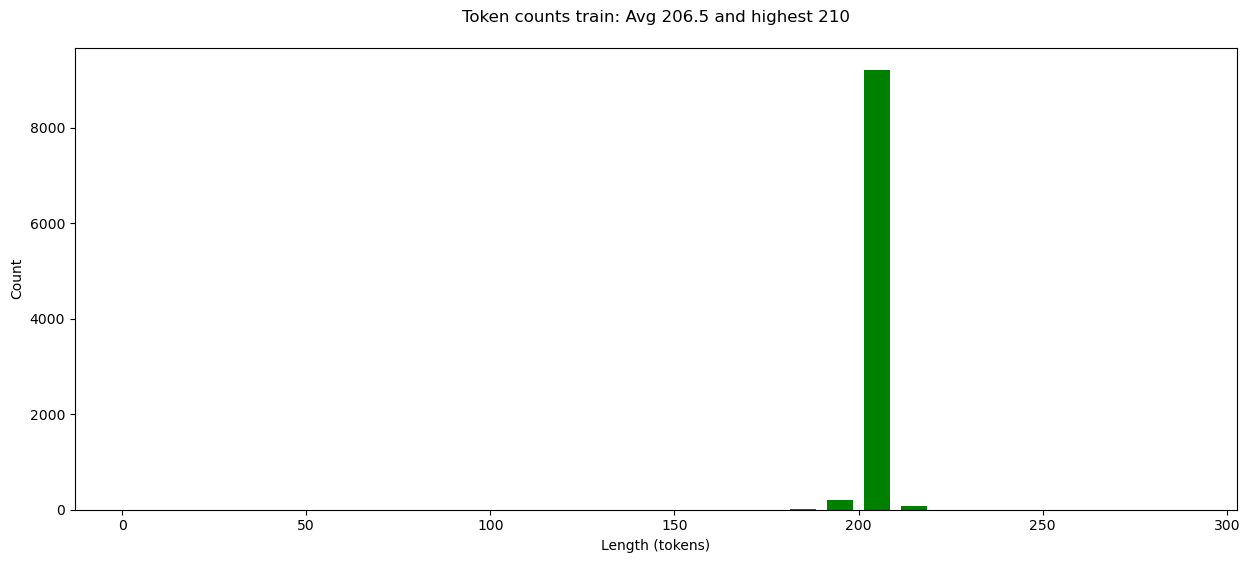

In [12]:
# Plot the distribution of token counts train
import matplotlib.pyplot as plt
tokens = [item.token_count for item in train_items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts train: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="green", bins=range(0, 300, 10))
plt.show()

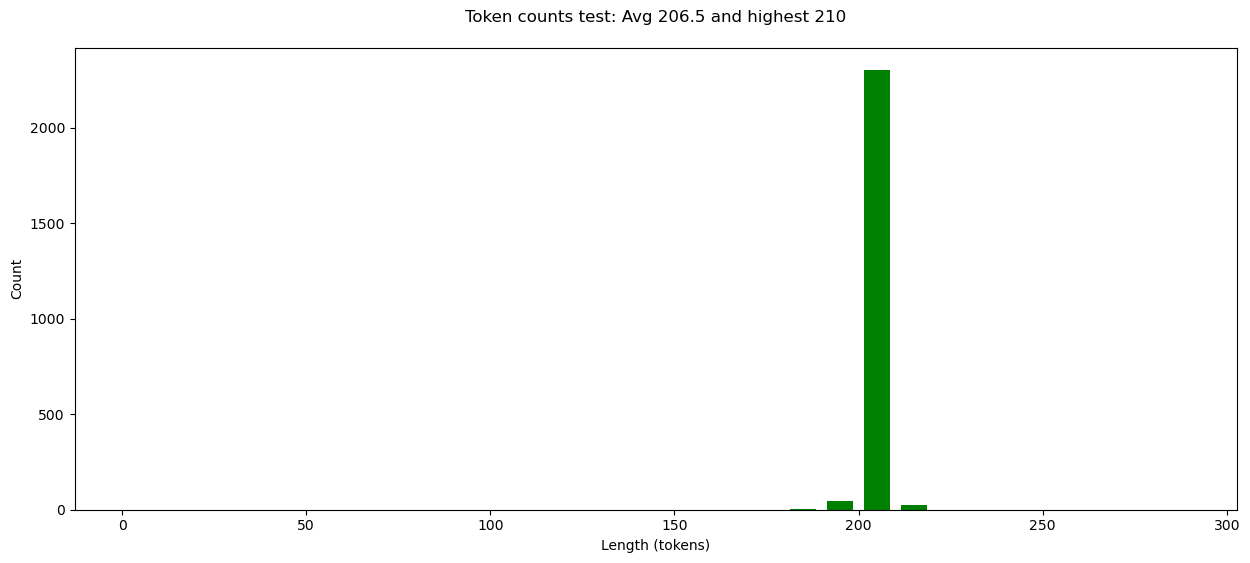

In [13]:
# Plot the distribution of token counts test
import matplotlib.pyplot as plt
tokens = [item.token_count for item in test_items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts test: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="green", bins=range(0, 300, 10))
plt.show()

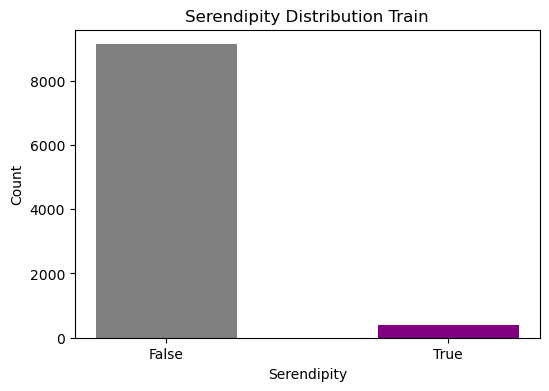

In [14]:
# Plot the distribution of serendipity
import matplotlib.pyplot as plt
from collections import Counter
serendipity_values = [item.serendipity for item in train_items]
count = Counter(serendipity_values)
labels = [False, True]
values = [count[False], count[True]]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=["gray", "purple"], width=0.5)
plt.xticks([False, True], ['False', 'True'])
plt.xlabel("Serendipity")
plt.ylabel("Count")
plt.title("Serendipity Distribution Train")
plt.show()

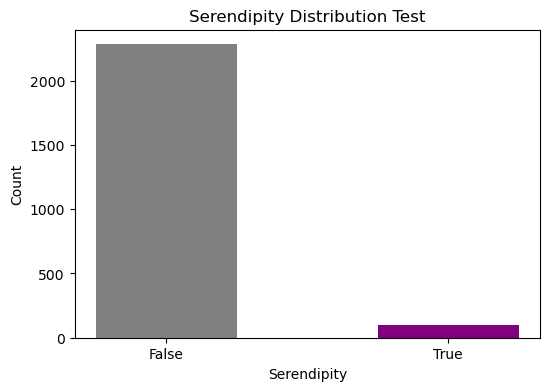

In [15]:
# Plot the distribution of serendipity
import matplotlib.pyplot as plt
from collections import Counter
serendipity_values = [item.serendipity for item in test_items]
count = Counter(serendipity_values)
labels = [False, True]
values = [count[False], count[True]]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=["gray", "purple"], width=0.5)
plt.xticks([False, True], ['False', 'True'])
plt.xlabel("Serendipity")
plt.ylabel("Count")
plt.title("Serendipity Distribution Test")
plt.show()

In [17]:
train_prompts = [item.prompt for item in train_items]
train_serendipity = [item.serendipity for item in train_items]
test_prompts = [item.test_prompt() for item in test_items]
test_serendipity = [item.serendipity for item in test_items]

In [19]:
# Create a Dataset from the lists
from datasets import load_dataset, Dataset, DatasetDict
train_dataset = Dataset.from_dict({"text": train_prompts, "serendipity": train_serendipity})
test_dataset = Dataset.from_dict({"text": test_prompts, "serendipity": test_serendipity})
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [22]:
# Log in to HuggingFace
# environment
from dotenv import load_dotenv
from huggingface_hub import login
import os

load_dotenv()
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', 'your-key-if-not-using-env')
hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)


HF_USER = "caroline-bastos03"
DATASET_NAME = f"{HF_USER}/serendipity-data"
dataset.push_to_hub(DATASET_NAME, private=False)

Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (manager).
Your token has been saved to C:\Users\carol\.cache\huggingface\token
Login successful


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/caroline-bastos03/serendipity-data/commit/a87f4d504db6e0a0c3f4726b45fa6608c903377d', commit_message='Upload dataset', commit_description='', oid='a87f4d504db6e0a0c3f4726b45fa6608c903377d', pr_url=None, pr_revision=None, pr_num=None)

In [24]:
import pickle

with open('train.pkl', 'wb') as file:
    pickle.dump(train_items, file)

with open('test.pkl', 'wb') as file:
    pickle.dump(test_items, file)